In [1]:
from mnist import MNIST 
import numpy as np
from pylab import *
from matplotlib import colors
%matplotlib inline

mndata = MNIST('./data')

mndata.load_training()
img_side = 28
n_mnist_pixels = img_side*img_side

In [2]:
labels = mndata.train_labels

cluster_size = 10
train_inputs_idx = []
for idx in range(10):
    label_idx = np.where(np.isin(labels,[idx]))[0][:cluster_size]
    train_inputs_idx.append(label_idx)

samples_idx = np.array(train_inputs_idx, dtype='int').flatten()
samples_idx.size

100

In [39]:
layer_size = 10*4
c = 4

I = np.zeros(n_mnist_pixels)
O = np.zeros(layer_size)
W = np.random.rand(O.size, I.size) * 0.001 + 0.5*c
print('W', W.shape, W.max(), W.min(), np.median(W))

push_delta = 0.4
k = 1

prec = 1e-30

epoch_cnt = 100
eps0 = 0.02

for epoch_idx in range(epoch_cnt):
    eps = (epoch_cnt - epoch_idx) * eps0

    for i_idx in samples_idx:
        img = mndata.train_images[i_idx]

        # infer
        I = np.array(img) / 255
        # DO = 1 / np.exp(np.abs(I*c - W)**2)
        DO = 1 - np.abs(I*2 - W)
        O = np.sum(DO, axis=1)
        # print('O', O.shape, O.max(), O.min(), np.median(O))

        # train
        dW = (I * 2 - W)  * O[np.newaxis].T
        # dW = (I - (W/c)) * 1e-2 * O[np.newaxis].T
        # print('dW', dW.shape, dW.max(), dW.min(), np.median(dW))

        winner_ids = np.argsort(O)[::-1]

        O.fill(0)
        O[winner_ids[0]] = 1
        O[winner_ids[1:1+k]] += -push_delta
        dW *= O[np.newaxis].T

        # update
        # dW_nc = np.abs(np.max(dW))
        # if dW_nc < prec:
        #     dW_nc = prec
        # dW = dW / np.abs(np.max(dW))
        W += dW * eps

print('W', W.shape, W.max(), W.min(), np.median(W))


W (40, 784) 2.0009999632100968 2.0000000537436153 2.000500843878556


C:\Users\Acer\AppData\Local\Temp\ipykernel_15036\2705169959.py:25: RuntimeWarning: overflow encountered in exp
  DO = 1 / np.exp(np.abs(I*c - W)**2)


W (40, 784) 952821168.0161165 -1014139308.7402428 -57.027341083848235


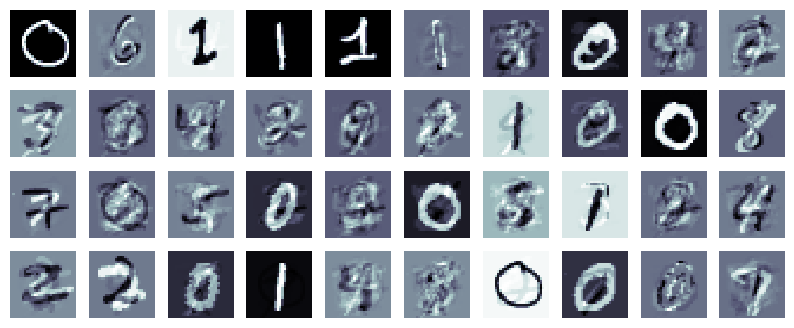

In [40]:
row_size = 10
col_size = int(layer_size / row_size)

figure(figsize=(row_size, col_size))

for col_idx in range(col_size):
    for row_idx in range(row_size):
        n_W_idx = col_idx * row_size + row_idx

        aimg = W[n_W_idx].reshape(img_side, img_side)

        subplot(col_size, row_size, n_W_idx + 1)

        imshow(aimg, interpolation='none', aspect='auto', cmap='bone')
        axis("off")

show()
